In [1]:
# Helper libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

In [2]:
x_train = []
y_train = []
x_test = []
y_test = []
low_green = np.array([25,52,72])
upp_green = np.array([102,255,255])
for i in range(12):
    for filename in glob.glob('Dataset/Train/'+str(i)+'/*.png'):
        im = cv2.imread(filename)        
        im = cv2.resize(im, (128, 128)) # resize to 128 * 128 pixel size
        hsv_image = cv2.cvtColor(im, cv2.COLOR_BGR2HSV) #convert BGR image to HSV for color descriptor
        green_mask = cv2.inRange(hsv_image, low_green, upp_green) # create green mask range
        green = cv2.bitwise_and(im, im, mask = green_mask)
        x_train.append(cv2.cvtColor(green, cv2.COLOR_BGR2GRAY)) # convert to grayscale, and append to array
        y_train.append(i) # append class
for filename in glob.glob('Dataset/Test/*.png'):
        im = cv2.imread(filename)
        im = cv2.resize(im, (128, 128))
        hsv_image = cv2.cvtColor(im, cv2.COLOR_BGR2HSV) #convert BGR image to HSV for color descriptor
        green_mask = cv2.inRange(hsv_image, low_green, upp_green) # create green mask range
        green = cv2.bitwise_and(im, im, mask = green_mask) # resize to 28 * 28 pixel size
        x_test.append(cv2.cvtColor(green, cv2.COLOR_BGR2GRAY)) 

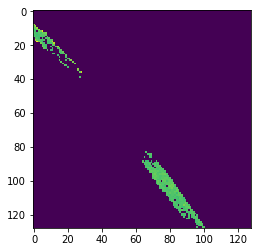

In [3]:
plt.imshow(x_train[0])
plt.show()
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255
y_train = np.array(y_train)

In [4]:
from sklearn import svm
xtrain = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[1]))
xtest = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*x_test.shape[1]))
lin_clf = svm.LinearSVC()
#print(lin_clf)

In [9]:
from sklearn.metrics import accuracy_score
prediction = lin_clf.fit(xtrain, y_train).predict(xtrain)
prediction
print(accuracy_score(y_train,prediction))

0.9993684210526316


/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


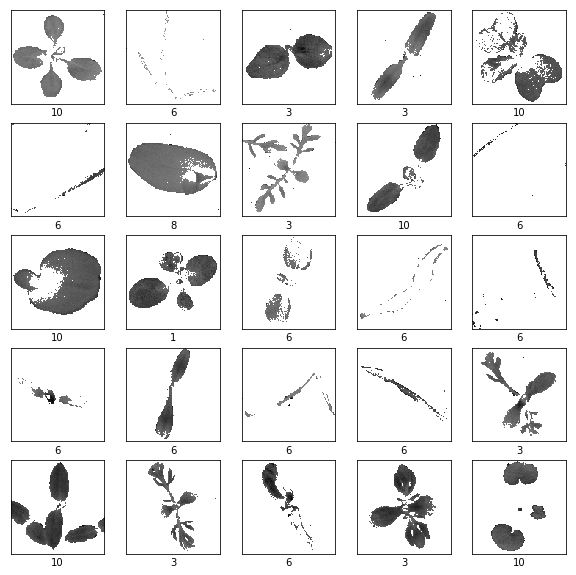

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(prediction[i])
plt.show()

In [12]:
prediction

array([10,  6,  3,  3, 10,  6,  8,  3, 10,  6, 10,  1,  6,  6,  6,  6,  6,
        6,  6,  3, 10,  3,  6,  3, 10,  6,  6,  3,  6,  6, 10,  6, 10,  6,
        6, 10,  6, 10, 10, 10,  6,  6,  6,  6,  8,  6, 10,  6,  3,  6,  6,
        8,  6,  8,  6,  6,  6, 10,  3,  6,  8,  6,  3,  6,  6,  8, 10,  6,
       10,  6,  6,  3,  1,  6,  3, 10,  6, 10,  6,  6,  6,  1,  6,  8,  6,
       10,  6,  6,  1, 10,  6,  6,  6,  6,  6,  6,  6,  6,  3,  6,  8,  6,
        3,  6,  6,  3,  3, 10,  6, 10,  3,  6,  6,  6,  3, 10,  6,  3,  6,
        6,  6,  3,  8,  8,  6, 10,  3, 10,  3, 10,  3,  6, 10,  6,  8,  6,
        6,  6,  6,  3,  3,  6,  3,  3, 10,  3,  6,  6, 10,  6,  8, 10,  6,
       10,  6,  6,  8,  6,  1, 10, 10, 10,  6,  6,  6,  6,  6,  3,  6, 10,
        1,  6,  6,  8,  1,  3, 10,  6,  6, 10,  6, 10, 10,  3,  6,  6, 10,
        6,  6,  6, 10,  8,  6,  3,  6,  6,  6,  6,  6,  3, 10,  8,  8, 10,
        1,  3,  6,  3, 10, 10,  6,  6,  6, 10, 10,  8,  6,  3,  6,  6,  6,
        6,  6,  3,  6,  6